In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 匯入 TCGA melanoma data, 實驗數據。
filename = './counts.txt'

with open(filename, 'rt') as f:
    #  @counts.txt
    data_table = pd.read_csv(f, index_col=0)  # Parse file with pandas
    '''
    counts.txt 讀來的檔案
    '''

# iloc = integer-location, 有走訪個意味，可以用 boolean-array, slice object, index 之類的
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
print("data_table.iloc[:5, :5]:")
print(" = = = = = = = = = \n")
print(data_table.iloc[:5, :5])
# column title 是個體代號。

data_table.iloc[:5, :5]:
 = = = = = = = = = 

       00624286-41dd-476f-a63b-d2a5f484bb45  TCGA-FS-A1Z0  TCGA-D9-A3Z1  \
A1BG                                1272.36        452.96        288.06   
A1CF                                   0.00          0.00          0.00   
A2BP1                                  0.00          0.00          0.00   
A2LD1                                164.38        552.43        201.83   
A2ML1                                 27.00          0.00          0.00   

       02c76d24-f1d2-4029-95b4-8be3bda8fdbe  TCGA-EB-A51B  
A1BG                                 400.11        420.46  
A1CF                                   1.00          0.00  
A2BP1                                  0.00          1.00  
A2LD1                                165.12         95.75  
A2ML1                                  0.00          8.00  


In [2]:
# samples 記錄著 資料的第一列(橫的抬頭)名稱。
samples = list(data_table.columns)  # columns 跟 index 不一樣。
print("data_table.columns[:5][:5]: ")
print(" = = = = = 個體代號 = = = = \n")
print(samples[:5][:5])

# =========================================

data_table.columns[:5][:5]: 
 = = = = = 個體代號 = = = = 

['00624286-41dd-476f-a63b-d2a5f484bb45', 'TCGA-FS-A1Z0', 'TCGA-D9-A3Z1', '02c76d24-f1d2-4029-95b4-8be3bda8fdbe', 'TCGA-EB-A51B']


In [3]:
filename = 'genes.csv'  # 記錄著 基因代號，基因長度。
with open(filename, 'rt') as f:
    gene_info = pd.read_csv(f, index_col=0)  # 以 GeneSymbol(基因名稱) 當作 index
print("genes.csv 前五筆:")
print(gene_info.iloc[:5, :])
print(" = = = = = = = = =")
print("genes.csv index:\n")
print(gene_info.index)  # 看 index
print(" = = = = = = = = = \n")
# =========================================

genes.csv 前五筆:
            GeneID  GeneLength
GeneSymbol                    
CPA1          1357        1724
GUCY2D        3000        3623
UBC           7316        2687
C11orf95     65998        5581
ANKMY2       57037        2611
 = = = = = = = = =
genes.csv index:

Index(['CPA1', 'GUCY2D', 'UBC', 'C11orf95', 'ANKMY2', 'C17orf81', 'TTC36',
       'IQCD', 'HSPA13', 'CD72',
       ...
       'SYNE2', 'RECK', 'C19orf40', 'KIAA0040', 'CT47A7', 'SIGIRR', 'OXTR',
       'DRAM1', 'LZTFL1', 'CSF3'],
      dtype='object', name='GeneSymbol', length=20503)
 = = = = = = = = = 



In [4]:
# 使用 index 來取數值 注意是用 loc
print("genes.csv loc['GUCY2D']:")
print(gene_info.loc['GUCY2D'])
print(" = = = = = = = = = \n")
# =========================================

genes.csv loc['GUCY2D']:
GeneID        3000
GeneLength    3623
Name: GUCY2D, dtype: int64
 = = = = = = = = = 



In [5]:
# 這邊會發現 資料 差三筆
print("資料差三筆:")
print("Genes in data_table:", data_table.shape[0])  # 實驗的計數資料
print("Genes in gene_info:", gene_info.shape[0])  # 基因長度資料 的筆數多 3
print(" = = = = = = = = = \n")
# =========================================

資料差三筆:
Genes in data_table: 20500
Genes in gene_info: 20503
 = = = = = = = = = 



In [6]:
# 此時我們需要過濾 DATA 確保 兩者的資料是吻合，順序也相符合, pandas 可以幫助我們。

# 先把名稱做交集，因為不知道是哪三筆要被去除。這邊用交集去計算
matched_index = pd.Index.intersection(data_table.index, gene_info.index)

# 接下來是對基因名稱做交集，並重新對資料做索引。
counts = np.asarray(data_table.loc[matched_index], dtype=int)

# 匹配過後的 基因名稱
gene_names = np.array(matched_index)
gene_names[:5]

array(['A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1'], dtype=object)

In [7]:
print(f'共 {counts.shape[0]} 個基因被測出，在 {counts.shape[1]} 個人之中.')

# gene_info 這是 pandas 的 dataframe
gene_lengths = np.asarray(gene_info.loc[matched_index]['GeneLength'], dtype=int)

print(counts.shape)
print(gene_lengths.shape)

共 20500 個基因被測出，在 375 個人之中.
(20500, 375)
(20500,)


In [8]:
# 在實驗中不同個體之間的計數差異可能很大，所以我們要看一下，所有基因的表現計數分布。

# 先以 "個體" 為單位。畫出總計數分布圖
# 使用方法是 KDE，(kernel density estimation)

# 代表每個 '個體' 的基因 "總?"長度(有被測量到的)
total_counts = np.sum(counts, axis=0)  # 把所有 行 都加總。
total_counts[:20]

array([41539237, 50824374, 35747651, 33532890, 48162893, 83478927,
       61652756, 56043182, 50066035, 44291909, 62103960, 52177691,
       39935196, 44712296, 49499950, 54994779, 64874312, 41901128,
       61124396, 74947233])

In [9]:
from scipy import stats

'''
kernel-density estimate，母體分布未知時會使用這個方式。
適合評估單峰(unimodal)的分布，如果是雙峰(bimodal)的會導致過度平滑(oversmoothed)
Kernel density estimation is a way to estimate the probability 
density function (PDF，機率密度函數) of a random variable in a non-parametric(無母數統計分析) way. 
'''

# 使用 高斯函數去 計算 density
density = stats.kde.gaussian_kde(total_counts)


In [21]:
# 生成一個 normal distribution
normal_dis = np.random.normal(scale= 20 ,loc=600,size=2000)
n_density = stats.kde.gaussian_kde(normal_dis)
normal_dis_size = normal_dis.shape[0]

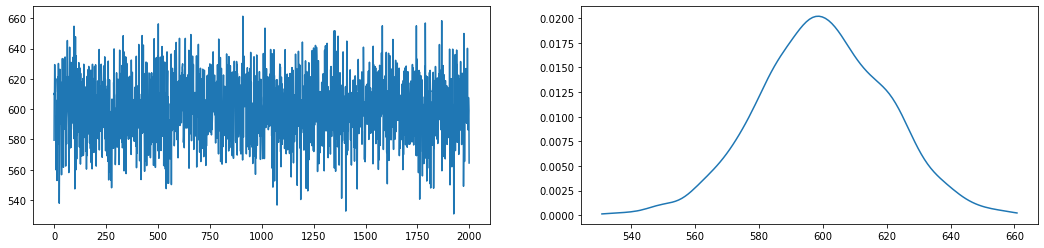

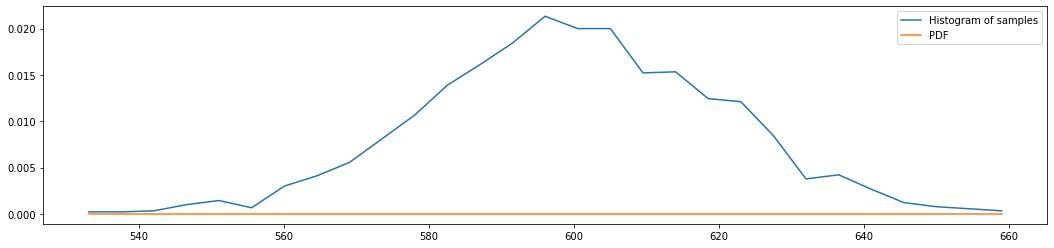

In [39]:
# 試用 kde function
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(18,4))
plt.subplot(121)
plt.plot(normal_dis)

plt.subplot(122)
x= np.arange(min(normal_dis),max(normal_dis),1)

plt.plot(x, n_density(x))

bins = np.linspace(min(normal_dis), max(normal_dis), 30)
# 繪製 normal distribution
fig, ax = plt.subplots(figsize=(18,4))
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)
histogram, bins = np.histogram(normal_dis, bins=bins, density=True)
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()
plt.show()

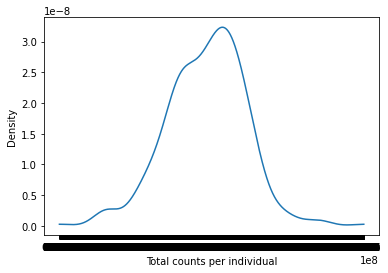


Count statistics:
 min:	6231205
 mean:	52995255.33866667
 max:	103219262
C_tmp.shape (20500, 375)
L.shape (20500,)
C_tmp.shape (20500, 375)
L.shape (20500, 1)
C_tmp.shape (20500, 375)
N.shape (375,)
C_tmp.shape (20500, 375)
N.shape (1, 375)
1.18.5


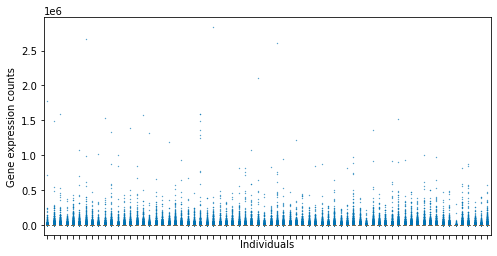

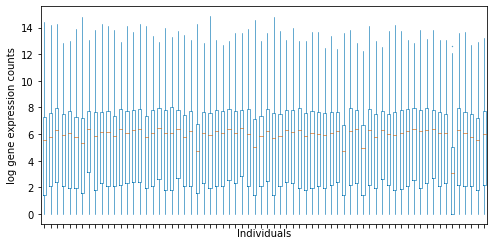

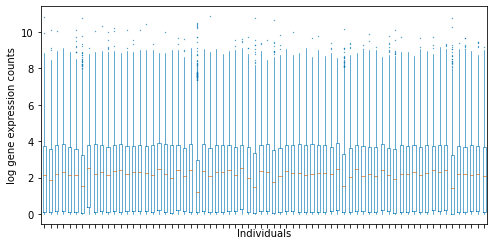

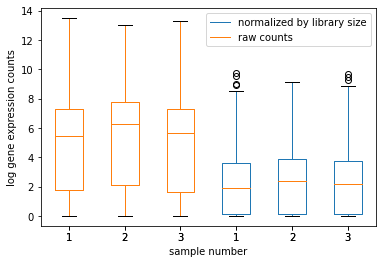

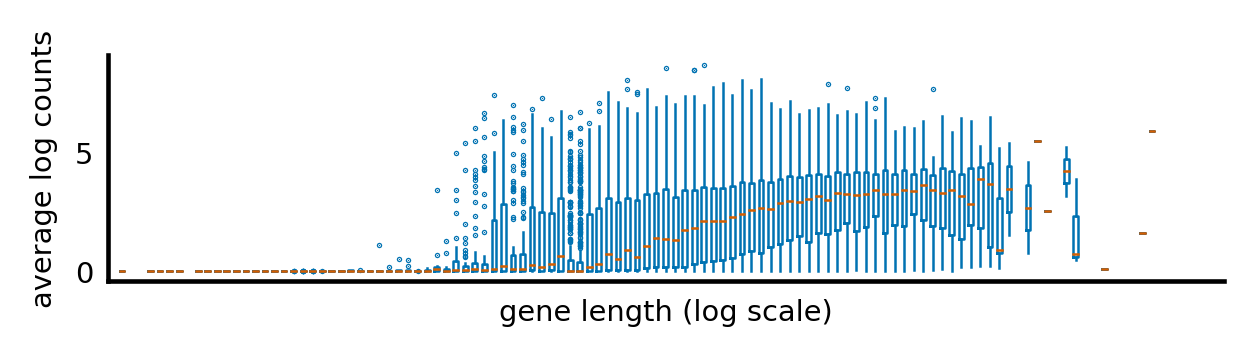

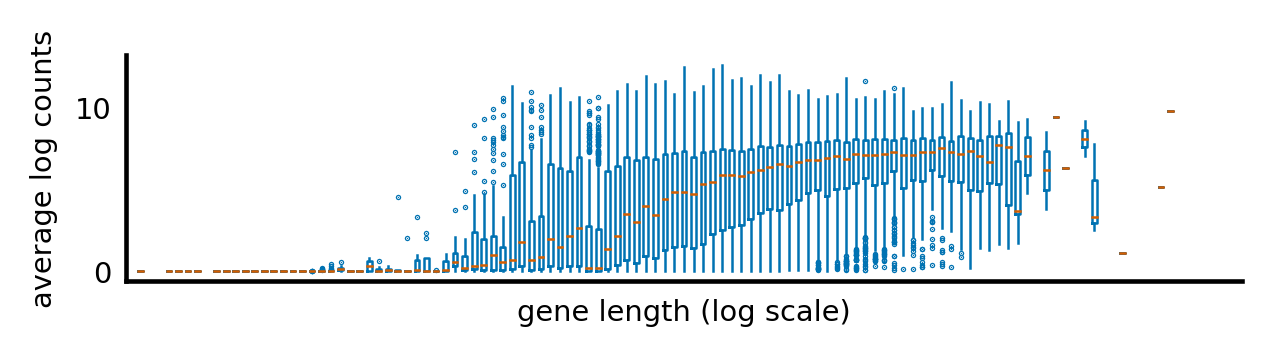

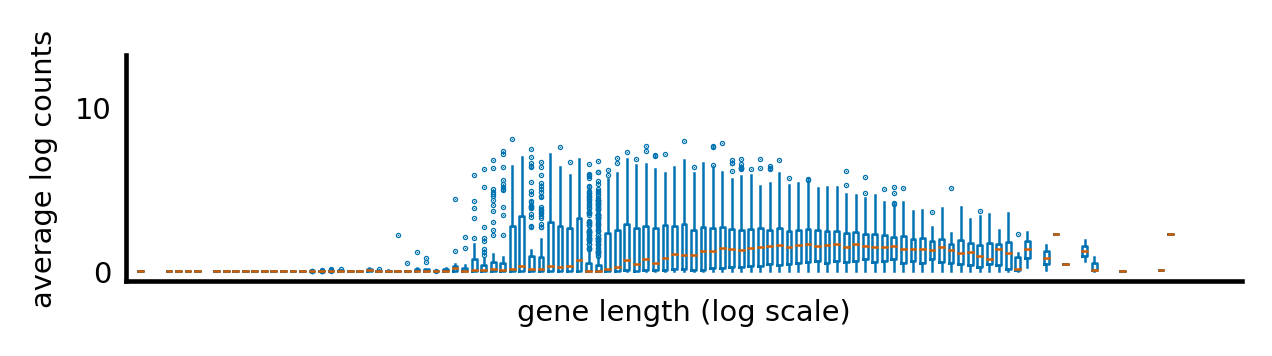

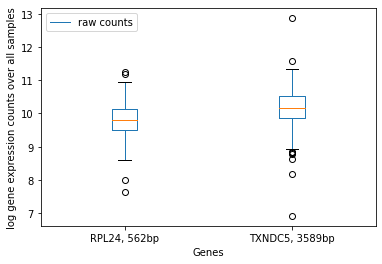

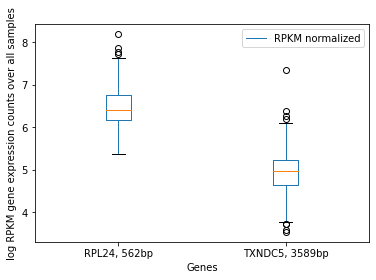

In [12]:
# density的數值範圍，用於繪圖。
x = np.arange(min(total_counts), max(total_counts), 10000)

# 繪製 density 圖
fig, ax = plt.subplots()
ax.plot(x, density(x))
plt.xticks(x)
ax.set_xlabel("Total counts per individual")
ax.set_ylabel("Density")
plt.show()

print(f'\nCount statistics:\n min:\t{min(total_counts)}'
      f'\n mean:\t{np.mean(total_counts)}'
      f'\n max:\t{np.max(total_counts)}')


# 由曲線圖，我們可以觀察出他們 最低 和 最高 的 "基因表現總數" 存在巨大的差異，
# 這種情形會說這些個體有不同的 library size。

#  針對個體的 library size 做正規化。

# 隨機取 70 筆資料出來繪圖。
samples_index = np.random.choice(range(counts.shape[1]), size=70, replace=False)  # replace=False 代表不重複取樣。
counts_subset = counts[:, samples_index]  # numpy slice 語法。

# 客製化的 x-axis 標記
def reduce_xaxis_labels(ax, factor):
    plt.setp(ax.xaxis.get_ticklabels(), visible = False)
    for label in ax.xaxis.get_ticklabels()[factor-1::factor]:
        label.set_visible(True)

fig, ax = plt.subplots(figsize=(8, 4))
with plt.style.context('thinner.mplstyle'):
    ax.boxplot(counts_subset)
    ax.set_xlabel("Individuals")
    ax.set_ylabel("Gene expression counts")
    reduce_xaxis_labels(ax, 5)

#  繪製每個個體的箱型圖
fig, ax = plt.subplots(figsize=(8, 4))
with plt.style.context('thinner.mplstyle'):
    ax.boxplot(np.log(counts_subset + 1))
    ax.set_xlabel("Individuals")
    ax.set_ylabel("log gene expression counts")
    reduce_xaxis_labels(ax, 5)

# Normalize by library size
# Divide the expression counts by the total counts for that individual
# Multiply by 1 million to get things back in a similar scale
counts_lib_norm = counts / total_counts * 1000000
# Notice how we just used broadcasting twice there!
counts_subset_lib_norm = counts_lib_norm[:,samples_index]

# Bar plot of expression counts by individual
fig, ax = plt.subplots(figsize=(8, 4))

with plt.style.context('thinner.mplstyle'):
    ax.boxplot(np.log(counts_subset_lib_norm + 1))
    ax.set_xlabel("Individuals")
    ax.set_ylabel("log gene expression counts")
    reduce_xaxis_labels(ax, 5)

import itertools as it
from collections import defaultdict


def class_boxplot(data, classes, colors=None, **kwargs):
    """Make a boxplot with boxes colored according to the class they belong to.

    Parameters
    ----------
    data : list of array-like of float
        The input data. One boxplot will be generated for each element
        in `data`.
    classes : list of string, same length as `data`
        The class each distribution in `data` belongs to.

    Other parameters
    ----------------
    kwargs : dict
        Keyword arguments to pass on to `plt.boxplot`.
    """
    all_classes = sorted(set(classes))
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    class2color = dict(zip(all_classes, it.cycle(colors)))

    # map classes to data vectors
    # other classes get an empty list at that position for offset
    class2data = defaultdict(list)
    for distrib, cls in zip(data, classes):
        for c in all_classes:
            class2data[c].append([])
        class2data[cls][-1] = distrib

    # then, do each boxplot in turn with the appropriate color
    fig, ax = plt.subplots()
    lines = []
    for cls in all_classes:
        # set color for all elements of the boxplot
        for key in ['boxprops', 'whiskerprops', 'flierprops']:
            kwargs.setdefault(key, {}).update(color=class2color[cls])
        # draw the boxplot
        box = ax.boxplot(class2data[cls], **kwargs)
        lines.append(box['whiskers'][0])
    ax.legend(lines, all_classes)
    return ax

log_counts_3 = list(np.log(counts.T[:3] + 1))
log_ncounts_3 = list(np.log(counts_lib_norm.T[:3] + 1))
ax = class_boxplot(log_counts_3 + log_ncounts_3,
                   ['raw counts'] * 3 + ['normalized by library size'] * 3,
                   labels=[1, 2, 3, 1, 2, 3])
ax.set_xlabel('sample number')
ax.set_ylabel('log gene expression counts');

def binned_boxplot(x, y, *,  # check out this Python 3 exclusive! (*see tip box)
                   xlabel='gene length (log scale)',
                   ylabel='average log counts'):
    """Plot the distribution of `y` dependent on `x` using many boxplots.

    Note: all inputs are expected to be log-scaled.

    Parameters
    ----------
    x: 1D array of float
        Independent variable values.
    y: 1D array of float
        Dependent variable values.
    """
    # Define bins of `x` depending on density of observations
    x_hist, x_bins = np.histogram(x, bins='auto')

    # Use `np.digitize` to number the bins
    # Discard the last bin edge because it breaks the right-open assumption
    # of `digitize`. The max observation correctly goes into the last bin.
    x_bin_idxs = np.digitize(x, x_bins[:-1])

    # Use those indices to create a list of arrays, each containing the `y`
    # values corresponding to `x`s in that bin. This is the input format
    # expected by `plt.boxplot`
    binned_y = [y[x_bin_idxs == i]
                for i in range(np.max(x_bin_idxs))]
    fig, ax = plt.subplots(figsize=(4.8,1))

    # Make the x-axis labels using the bin centers
    x_bin_centers = (x_bins[1:] + x_bins[:-1]) / 2
    x_ticklabels = np.round(np.exp(x_bin_centers)).astype(int)

    # make the boxplot
    ax.boxplot(binned_y, labels=x_ticklabels)

    # show only every 10th label to prevent crowding on x-axis
    reduce_xaxis_labels(ax, 10)

    # Adjust the axis names
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

log_counts = np.log(counts_lib_norm + 1)
mean_log_counts = np.mean(log_counts, axis=1)  # across samples
log_gene_lengths = np.log(gene_lengths)

with plt.style.context('thinner.mplstyle'):
    binned_boxplot(x=log_gene_lengths, y=mean_log_counts);

# Make our variable names the same as the RPKM formula so we can compare easily
C = counts
N = np.sum(counts, axis=0)  # sum each column to get total reads per sample
L = gene_lengths  # lengths for each gene, matching rows in `C`

# Multiply all counts by $10^9$. Note that ^ in Python is bitwise-or.
# Exponentiation is denoted by `**`
# Avoid overflow by converting C to float, see tip "Numbers and computers"
C_tmp = 10**9 * C.astype(float)

print('C_tmp.shape', C_tmp.shape)
print('L.shape', L.shape)

L = L[:, np.newaxis] # append a dimension to L, with value 1
print('C_tmp.shape', C_tmp.shape)
print('L.shape', L.shape)

# Divide each row by the gene length for that gene (L)
C_tmp = C_tmp / L

N = np.sum(counts, axis=0) # sum each column to get total reads per sample

# Check the shapes of C_tmp and N
print('C_tmp.shape', C_tmp.shape)
print('N.shape', N.shape)

# Divide each column by the total counts for that column (N)
N = N[np.newaxis, :]
print('C_tmp.shape', C_tmp.shape)
print('N.shape', N.shape)

# Divide each column by the total counts for that column (N)
rpkm_counts = C_tmp / N

def rpkm(counts, lengths):
    """Calculate reads per kilobase transcript per million reads.

    RPKM = (10^9 * C) / (N * L)

    Where:
    C = Number of reads mapped to a gene
    N = Total mapped reads in the experiment
    L = Exon length in base pairs for a gene

    Parameters
    ----------
    counts: array, shape (N_genes, N_samples)
        RNAseq (or similar) count data where columns are individual samples
        and rows are genes.
    lengths: array, shape (N_genes,)
        Gene lengths in base pairs in the same order
        as the rows in counts.

    Returns
    -------
    normed : array, shape (N_genes, N_samples)
        The RPKM normalized counts matrix.
    """
    C = counts.astype(float)  # use float to avoid overflow with `1e9 * C`
    N = np.sum(C, axis=0)  # sum each column to get total reads per sample
    L = lengths

    normed = 1e9 * C / (N[np.newaxis, :] * L[:, np.newaxis])

    return(normed)

counts_rpkm = rpkm(counts, gene_lengths)

log_counts = np.log(counts + 1)
mean_log_counts = np.mean(log_counts, axis=1)
log_gene_lengths = np.log(gene_lengths)

with plt.style.context('thinner.mplstyle'):
    # Keep track of axis object so that the next plot can have the same scale
    unnormalized_ax = binned_boxplot(x=log_gene_lengths, y=mean_log_counts)

log_counts = np.log(counts_rpkm + 1)
mean_log_counts = np.mean(log_counts, axis=1)
log_gene_lengths = np.log(gene_lengths)

with plt.style.context('thinner.mplstyle'):
    rpkm_ax = binned_boxplot(x=log_gene_lengths, y=mean_log_counts)
    # Set the axis limits to those of the previous plot for visual comparison
    rpkm_ax.set_ylim(unnormalized_ax.get_ylim())

gene_idxs = np.nonzero((gene_names == 'RPL24') |
                       (gene_names == 'TXNDC5'))
gene1, gene2 = gene_names[gene_idxs]
len1, len2 = gene_lengths[gene_idxs]
gene_labels = [f'{gene1}, {len1}bp', f'{gene2}, {len2}bp']

log_counts = list(np.log(counts[gene_idxs] + 1))
log_ncounts = list(np.log(counts_rpkm[gene_idxs] + 1))

ax = class_boxplot(log_counts,
                   ['raw counts'] * 3,
                   labels=gene_labels)
ax.set_xlabel('Genes')
ax.set_ylabel('log gene expression counts over all samples');

ax = class_boxplot(log_ncounts,
                   ['RPKM normalized'] * 3,
                   labels=gene_labels)
ax.set_xlabel('Genes')
ax.set_ylabel('log RPKM gene expression counts over all samples');

print(np.__version__)
